In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import time
import datetime

In [2]:
listings = pd.read_csv('listings_hongkong.csv')

reviews = pd.read_csv('reviews_hongkong.csv')

In [3]:
listings.shape

(6084, 74)

In [4]:
listings.dtypes

id                                                int64
listing_url                                      object
scrape_id                                       float64
last_scraped                                     object
name                                             object
                                                 ...   
calculated_host_listings_count                    int64
calculated_host_listings_count_entire_homes       int64
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_shared_rooms       int64
reviews_per_month                               float64
Length: 74, dtype: object

In [5]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,17891,https://www.airbnb.com/rooms/17891,2.021100e+13,23-10-2021,Large Light Filled Loft,"Gorgeous and spacious loft, in the best locati...",Best neighborhood in Hong Kong! A mix of old a...,https://a0.muscache.com/pictures/119686/6ced58...,69063,https://www.airbnb.com/users/show/69063,...,4.93,4.90,4.66,NaN,f,1,1,0,0,1.07
1,69074,https://www.airbnb.com/rooms/69074,2.021100e+13,23-10-2021,Beautiful oasis of plants & art @ best location,An ideal Hong location any visitor--hip withou...,"In the upper part of trendy, hip Sheung Wan, w...",https://a0.muscache.com/pictures/84364564/1e0c...,160139,https://www.airbnb.com/users/show/160139,...,4.91,4.90,4.69,NaN,f,1,1,0,0,1.19
2,103760,https://www.airbnb.com/rooms/103760,2.021100e+13,23-10-2021,Central Centre 5 min walk to/from Central MTR,"Located right in the heart of Central, this 2 ...",NaN,https://a0.muscache.com/pictures/815221/056993...,304876,https://www.airbnb.com/users/show/304876,...,4.60,4.72,4.40,NaN,f,9,5,4,0,3.05
3,104626,https://www.airbnb.com/rooms/104626,2.021100e+13,23-10-2021,Entire Flat - Next to Man Mo Temple,<b>The space</b><br />Situated in one of Hong ...,NaN,https://a0.muscache.com/pictures/1947265/ef01a...,544166,https://www.airbnb.com/users/show/544166,...,4.93,4.79,4.71,NaN,f,1,1,0,0,0.12
4,132773,https://www.airbnb.com/rooms/132773,2.021100e+13,23-10-2021,Fabulous 2 Bdrm Aprt Open kitchen,"Nicely decorated, spacious 2 bedroom apartment...",The Sheung Wan neighbourhood is ever changing ...,https://a0.muscache.com/pictures/36936441/e4c1...,304876,https://www.airbnb.com/users/show/304876,...,4.64,4.40,4.38,NaN,f,9,5,4,0,2.45


In [6]:
reviews.shape

(106538, 6)

In [7]:
reviews.head(5)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,17891,37352.0,23-04-2010,76132,Tamara,The apartment on Holly wood Rd was exactly as ...
1,17891,56688.0,24-06-2010,97136,Wendy,"Apartment was perfect - stylish, spacious and..."
2,17891,76243.0,09-08-2010,163312,Angela,We loved staying here for the weekend. The apa...
3,17891,93590.0,09-09-2010,148333,Jennifer,An awesome loft that looks just like it does i...
4,17891,108082.0,29-09-2010,218702,Matt,"Candace was great, she prepared the loft with ..."


In [3]:
# merging listing and reviews data

dataframe= pd.merge(reviews, listings[['neighbourhood_cleansed', 'host_id', 'latitude','longitude', 'number_of_reviews', 'id', 'property_type','review_scores_communication','review_scores_location','review_scores_value','review_scores_cleanliness','review_scores_checkin','review_scores_rating','review_scores_accuracy']], 
              left_on='listing_id', right_on='id', how='left')

dataframe.rename(columns = {'id_x':'id', 'neighbourhood_cleansed':'neighbourhood_group'}, inplace=True)
dataframe.drop(['id_y'], axis=1, inplace=True)

In [4]:
dataframe.head(5)

,listing_id,id,date,reviewer_id,reviewer_name,comments,neighbourhood_group,host_id,latitude,longitude,number_of_reviews,property_type,review_scores_communication,review_scores_location,review_scores_value,review_scores_cleanliness,review_scores_checkin,review_scores_rating,review_scores_accuracy
0,17891,37352.0,23-04-2010,76132,Tamara,The apartment on Holly wood Rd was exactly as ...,Central & Western,69063,22.28327,114.14988,73,Entire rental unit,4.93,4.9,4.66,4.51,4.92,4.76,4.73
1,17891,56688.0,24-06-2010,97136,Wendy,"Apartment was perfect - stylish, spacious and...",Central & Western,69063,22.28327,114.14988,73,Entire rental unit,4.93,4.9,4.66,4.51,4.92,4.76,4.73
2,17891,76243.0,09-08-2010,163312,Angela,We loved staying here for the weekend. The apa...,Central & Western,69063,22.28327,114.14988,73,Entire rental unit,4.93,4.9,4.66,4.51,4.92,4.76,4.73
3,17891,93590.0,09-09-2010,148333,Jennifer,An awesome loft that looks just like it does i...,Central & Western,69063,22.28327,114.14988,73,Entire rental unit,4.93,4.9,4.66,4.51,4.92,4.76,4.73
4,17891,108082.0,29-09-2010,218702,Matt,"Candace was great, she prepared the loft with ...",Central & Western,69063,22.28327,114.14988,73,Entire rental unit,4.93,4.9,4.66,4.51,4.92,4.76,4.73


In [10]:
dataframe.shape

(106538, 19)

In [11]:
#count missing values
dataframe['comments'].isnull().sum()

100

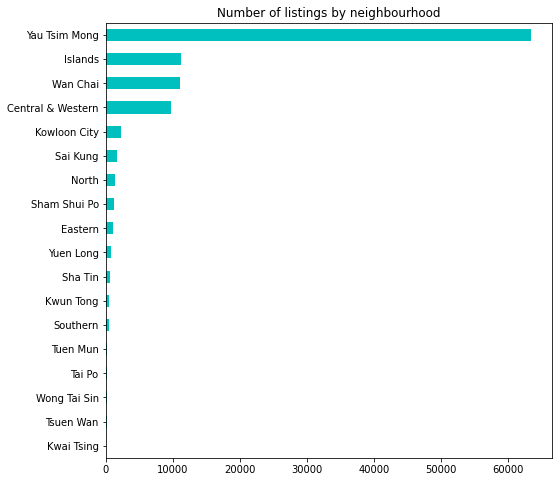

In [6]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
dataframe['neighbourhood_group'].value_counts().sort_values(ascending=True).plot.barh(x='neighbourhood_group',
                      y='count',
                      ax=ax,
                      color="c")

ax.set_title("Number of listings by neighbourhood")

plt.show()

In [12]:
# group by hosts and count the number of unique listings --> cast it to a dataframe
properties_per_host = pd.DataFrame(dataframe.groupby('host_id')['listing_id'].nunique())

# sort unique values descending and show the Top20
properties_per_host.sort_values(by=['listing_id'], ascending=False, inplace=True)
properties_per_host.head(20)

,listing_id
host_id,
122131447,64
4584648,50
14861546,48
2767794,40
109310747,28
37289493,28
46132766,25
31947768,25
6067974,24


In [13]:
# TOP1 HOST

top1_host = dataframe.host_id == 122131447
dataframe[top1_host].neighbourhood_group.value_counts()

pd.DataFrame(dataframe[top1_host].groupby('neighbourhood_group')['listing_id'].nunique())

,listing_id
neighbourhood_group,
Kowloon City,6
Yau Tsim Mong,58


In [14]:
pd.DataFrame(dataframe[top1_host].groupby('property_type')['listing_id'].nunique())

,listing_id
property_type,
Entire serviced apartment,1
Private room in condominium (condo),9
Private room in rental unit,22
Private room in serviced apartment,32


In [15]:
top2_host = dataframe.host_id == 4584648
dataframe[top2_host].neighbourhood_group.value_counts()

pd.DataFrame(dataframe[top2_host].groupby('neighbourhood_group')['listing_id'].nunique())

,listing_id
neighbourhood_group,
Central & Western,14
Eastern,6
Kowloon City,1
Sham Shui Po,2
Wan Chai,11
Wong Tai Sin,1
Yau Tsim Mong,15


In [16]:
pd.DataFrame(dataframe[top2_host].groupby('property_type')['listing_id'].nunique())

,listing_id
property_type,
Entire rental unit,1
Private room in rental unit,49


# Preprocessing

In [17]:
dataframe.isna().sum()

listing_id                       0
id                               0
date                             0
reviewer_id                      0
reviewer_name                    3
comments                       100
neighbourhood_group              0
host_id                          0
latitude                         0
longitude                        0
number_of_reviews                0
property_type                    0
review_scores_communication     75
review_scores_location          74
review_scores_value             74
review_scores_cleanliness       74
review_scores_checkin           74
review_scores_rating             0
review_scores_accuracy          74
dtype: int64

In [18]:
dataframe.dropna(inplace=True)
dataframe.isna().sum()

listing_id                     0
id                             0
date                           0
reviewer_id                    0
reviewer_name                  0
comments                       0
neighbourhood_group            0
host_id                        0
latitude                       0
longitude                      0
number_of_reviews              0
property_type                  0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_rating           0
review_scores_accuracy         0
dtype: int64

In [19]:
dataframe.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,neighbourhood_group,host_id,latitude,longitude,number_of_reviews,property_type,review_scores_communication,review_scores_location,review_scores_value,review_scores_cleanliness,review_scores_checkin,review_scores_rating,review_scores_accuracy
0,17891,37352.0,23-04-2010,76132,Tamara,The apartment on Holly wood Rd was exactly as ...,Central & Western,69063,22.28327,114.14988,73,Entire rental unit,4.93,4.9,4.66,4.51,4.92,4.76,4.73
1,17891,56688.0,24-06-2010,97136,Wendy,"Apartment was perfect - stylish, spacious and...",Central & Western,69063,22.28327,114.14988,73,Entire rental unit,4.93,4.9,4.66,4.51,4.92,4.76,4.73
2,17891,76243.0,09-08-2010,163312,Angela,We loved staying here for the weekend. The apa...,Central & Western,69063,22.28327,114.14988,73,Entire rental unit,4.93,4.9,4.66,4.51,4.92,4.76,4.73
3,17891,93590.0,09-09-2010,148333,Jennifer,An awesome loft that looks just like it does i...,Central & Western,69063,22.28327,114.14988,73,Entire rental unit,4.93,4.9,4.66,4.51,4.92,4.76,4.73
4,17891,108082.0,29-09-2010,218702,Matt,"Candace was great, she prepared the loft with ...",Central & Western,69063,22.28327,114.14988,73,Entire rental unit,4.93,4.9,4.66,4.51,4.92,4.76,4.73


In [20]:
dataframe.groupby('neighbourhood_group')["review_scores_rating"].describe().transpose()

neighbourhood_group,Central & Western,Eastern,Islands,Kowloon City,Kwai Tsing,Kwun Tong,North,Sai Kung,Sha Tin,Sham Shui Po,Southern,Tai Po,Tsuen Wan,Tuen Mun,Wan Chai,Wong Tai Sin,Yau Tsim Mong,Yuen Long
count,9784.000000,1103.000000,11237.000000,2297.000000,58.000000,493.000000,1452.000000,1644.000000,674.000000,1184.000000,451.000000,199.000000,132.000000,199.000000,11071.000000,194.000000,63327.000000,861.000000
mean,4.658422,4.723200,4.702616,4.563766,4.760000,4.766876,4.763189,4.823942,4.774466,4.602399,4.755122,4.748945,4.763030,4.634623,4.630678,4.922887,4.604181,4.720070
std,0.245977,0.346768,0.245097,0.315233,0.233193,0.216166,0.230313,0.120207,0.160119,0.247893,0.189531,0.199386,0.184461,0.257160,0.237391,0.077526,0.246873,0.329095
min,0.000000,1.000000,1.000000,3.000000,4.250000,1.000000,3.000000,4.500000,4.000000,2.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,1.000000
25%,4.560000,4.720000,4.600000,4.430000,4.880000,4.750000,4.700000,4.720000,4.590000,4.510000,4.700000,4.690000,4.820000,4.380000,4.480000,4.940000,4.470000,4.630000
50%,4.670000,4.830000,4.790000,4.670000,4.880000,4.790000,4.830000,4.830000,4.840000,4.600000,4.790000,4.830000,4.830000,4.540000,4.680000,4.940000,4.640000,4.710000
75%,4.810000,4.880000,4.870000,4.750000,4.880000,4.880000,4.890000,4.920000,4.890000,4.800000,4.850000,4.880000,4.830000,4.930000,4.770000,4.940000,4.790000,4.960000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.940000,5.000000,5.000000


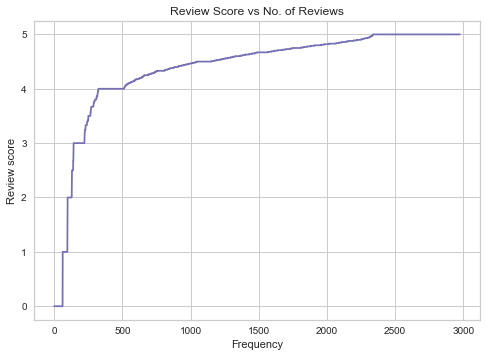

In [103]:
listings['review_scores_rating'].sort_values().reset_index(drop=True).dropna().plot()
plt.title("Review Score vs No. of Reviews")
plt.xlabel("Frequency")
plt.ylabel("Review score");

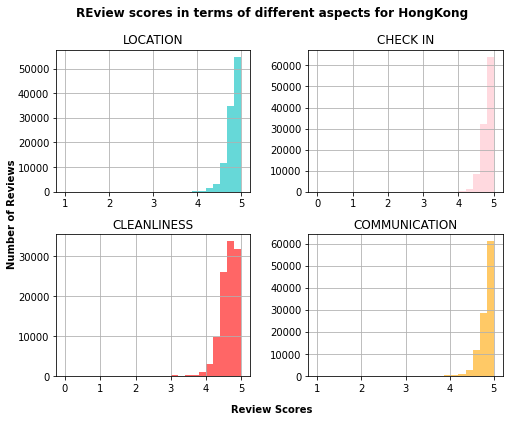

In [5]:
# all scores in 4 histograms
fig, axes = plt.subplots(2, 2, figsize=(8,6))

# plot all 4 histograms
dataframe.hist('review_scores_location', bins=25, ax=axes[0,0], color='c', alpha=0.6)
axes[0,0].set_title('LOCATION')

dataframe.hist('review_scores_checkin', bins=25, ax=axes[0,1], color='pink', alpha=0.6)
axes[0,1].set_title('CHECK IN')

dataframe.hist('review_scores_cleanliness', bins=25, ax=axes[1,0], color='red', alpha=0.6)
axes[1,0].set_title('CLEANLINESS')

dataframe.hist('review_scores_communication', bins=25, ax=axes[1,1], color='orange', alpha=0.6)
axes[1,1].set_title('COMMUNICATION')




# plot common x- and y-label
fig.text(0.5, 0.04, 'Review Scores',  fontweight='bold', ha='center')
fig.text(0.04, 0.5, 'Number of Reviews', fontweight='bold', va='center', rotation='vertical')

# plot title
plt.suptitle('REview scores in terms of different aspects for HongKong', fontsize=12, fontweight='bold');

# Word Frequency

In [23]:
import itertools
import collections

def convert(lst): 
    return ([i for item in lst for i in item.lower().split()]) 

#fill missing values with NA
all_words_review = convert(dataframe['comments'].fillna(""))

In [24]:
# WORDS ARE SPLIT TO COUNT FREQUENCY

count_word = collections.Counter(all_words_review) #Count word frequency

clean_word_count = pd.DataFrame(count_word.most_common(5),
                             columns=['words', 'count'])

clean_word_count.head()

,words,count
0,the,137521
1,and,115135
2,to,81111
3,is,72777
4,a,69808


# Removing Punctuations, Numbers, and Special Characters

In [25]:
dataframe['comments'] = dataframe['comments'].str.replace("[^a-zA-Z#]", " ")

In [26]:
dataframe.head(5)

,listing_id,id,date,reviewer_id,reviewer_name,comments,neighbourhood_group,host_id,latitude,longitude,number_of_reviews,property_type,review_scores_communication,review_scores_location,review_scores_value,review_scores_cleanliness,review_scores_checkin,review_scores_rating,review_scores_accuracy
0,17891,37352.0,23-04-2010,76132,Tamara,The apartment on Holly wood Rd was exactly as ...,Central & Western,69063,22.28327,114.14988,73,Entire rental unit,4.93,4.9,4.66,4.51,4.92,4.76,4.73
1,17891,56688.0,24-06-2010,97136,Wendy,Apartment was perfect stylish spacious and...,Central & Western,69063,22.28327,114.14988,73,Entire rental unit,4.93,4.9,4.66,4.51,4.92,4.76,4.73
2,17891,76243.0,09-08-2010,163312,Angela,We loved staying here for the weekend The apa...,Central & Western,69063,22.28327,114.14988,73,Entire rental unit,4.93,4.9,4.66,4.51,4.92,4.76,4.73
3,17891,93590.0,09-09-2010,148333,Jennifer,An awesome loft that looks just like it does i...,Central & Western,69063,22.28327,114.14988,73,Entire rental unit,4.93,4.9,4.66,4.51,4.92,4.76,4.73
4,17891,108082.0,29-09-2010,218702,Matt,Candace was great she prepared the loft with ...,Central & Western,69063,22.28327,114.14988,73,Entire rental unit,4.93,4.9,4.66,4.51,4.92,4.76,4.73


# Removing short words

In [27]:
#to remove all the words having length 3 or less. 
#For example, terms like “hmm”, “oh” are of very little use. It is better to get rid of them.

In [28]:
dataframe['comments'] = dataframe['comments'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

dataframe.head(10)

,listing_id,id,date,reviewer_id,reviewer_name,comments,neighbourhood_group,host_id,latitude,longitude,number_of_reviews,property_type,review_scores_communication,review_scores_location,review_scores_value,review_scores_cleanliness,review_scores_checkin,review_scores_rating,review_scores_accuracy
0,17891,37352.0,23-04-2010,76132,Tamara,apartment Holly wood exactly described comfort...,Central & Western,69063,22.28327,114.14988,73,Entire rental unit,4.93,4.9,4.66,4.51,4.92,4.76,4.73
1,17891,56688.0,24-06-2010,97136,Wendy,Apartment perfect stylish spacious comfortable...,Central & Western,69063,22.28327,114.14988,73,Entire rental unit,4.93,4.9,4.66,4.51,4.92,4.76,4.73
2,17891,76243.0,09-08-2010,163312,Angela,loved staying here weekend apartment fantastic...,Central & Western,69063,22.28327,114.14988,73,Entire rental unit,4.93,4.9,4.66,4.51,4.92,4.76,4.73
3,17891,93590.0,09-09-2010,148333,Jennifer,awesome loft that looks just like does photos ...,Central & Western,69063,22.28327,114.14988,73,Entire rental unit,4.93,4.9,4.66,4.51,4.92,4.76,4.73
4,17891,108082.0,29-09-2010,218702,Matt,Candace great prepared loft with fresh towels ...,Central & Western,69063,22.28327,114.14988,73,Entire rental unit,4.93,4.9,4.66,4.51,4.92,4.76,4.73
5,17891,128752.0,28-10-2010,52335,Alexander,Candace loft even more amazing than expected m...,Central & Western,69063,22.28327,114.14988,73,Entire rental unit,4.93,4.9,4.66,4.51,4.92,4.76,4.73
6,17891,145018.0,27-11-2010,222823,Jennifer,Candace flat worked perfectly visit Hong Kong ...,Central & Western,69063,22.28327,114.14988,73,Entire rental unit,4.93,4.9,4.66,4.51,4.92,4.76,4.73
7,17891,158395.0,25-12-2010,40500,Robby,Candace place fantastic super accommodating ev...,Central & Western,69063,22.28327,114.14988,73,Entire rental unit,4.93,4.9,4.66,4.51,4.92,4.76,4.73
8,17891,169971.0,13-01-2011,206409,Brian,Very nice stay pretty much advertised Very con...,Central & Western,69063,22.28327,114.14988,73,Entire rental unit,4.93,4.9,4.66,4.51,4.92,4.76,4.73
9,17891,175148.0,26-01-2011,79977,Thorsten,This Hong Kong home whenever return lots space...,Central & Western,69063,22.28327,114.14988,73,Entire rental unit,4.93,4.9,4.66,4.51,4.92,4.76,4.73


# Tokenization

In [29]:
#Tokens are individual terms or words, and tokenization is the process of splitting a string of text into tokens.

In [30]:
tokenized_dataframe = dataframe['comments'].apply(lambda x: x.split())
tokenized_dataframe.head(10)

0    [apartment, Holly, wood, exactly, described, c...
1    [Apartment, perfect, stylish, spacious, comfor...
2    [loved, staying, here, weekend, apartment, fan...
3    [awesome, loft, that, looks, just, like, does,...
4    [Candace, great, prepared, loft, with, fresh, ...
5    [Candace, loft, even, more, amazing, than, exp...
6    [Candace, flat, worked, perfectly, visit, Hong...
7    [Candace, place, fantastic, super, accommodati...
8    [Very, nice, stay, pretty, much, advertised, V...
9    [This, Hong, Kong, home, whenever, return, lot...
Name: comments, dtype: object

# Stemming

In [31]:
#Stemming is a rule-based process of stripping the suffixes (“ing”, “ly”, “es”, “s” etc) from a word

In [32]:
from nltk import PorterStemmer

ps = PorterStemmer()

tokenized_dataframe = tokenized_dataframe.apply(lambda x: [ps.stem(i) for i in x])

tokenized_dataframe.head()

0    [apart, holli, wood, exactli, describ, comfort...
1    [apart, perfect, stylish, spaciou, comfort, gr...
2    [love, stay, here, weekend, apart, fantast, mo...
3    [awesom, loft, that, look, just, like, doe, ph...
4    [candac, great, prepar, loft, with, fresh, tow...
Name: comments, dtype: object

# Removing stopwords of no value

In [33]:
# import necessary libraries
from nltk.corpus import stopwords
from wordcloud import WordCloud
from collections import Counter
from PIL import Image

import re
import string

In [34]:
stop_words = set(stopwords.words(['english']))

# View a few words from the set
list(stop_words)[0:30]

["didn't",
 'itself',
 "isn't",
 "shouldn't",
 'of',
 'now',
 'm',
 'aren',
 'just',
 'couldn',
 "mustn't",
 'did',
 's',
 'will',
 'whom',
 'up',
 "doesn't",
 'out',
 'those',
 'other',
 'i',
 'with',
 'most',
 'same',
 'why',
 'which',
 'having',
 'ain',
 'll',
 'under']

In [35]:
words_review_cleaned = [word for word in all_words_review if word not in stop_words]
words_review_count = collections.Counter(words_review_cleaned)

word_review_count_df = pd.DataFrame(words_review_count.most_common(15),
                             columns=['words', 'count'])

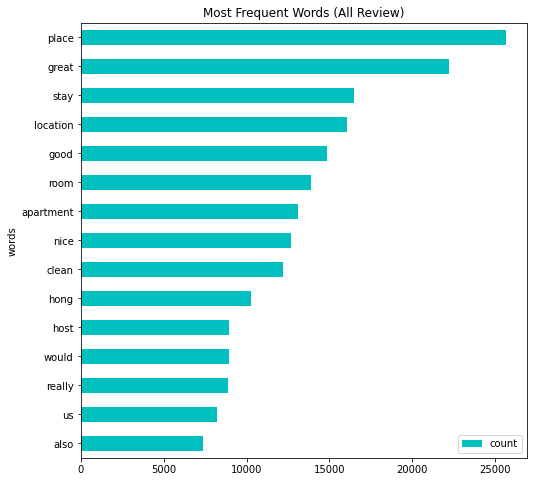

In [36]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
word_review_count_df.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="c")

ax.set_title("Most Frequent Words (All Review)")

plt.show()

# Language Detect

In [37]:
from langdetect import detect

In [38]:
# write the function that detects the language
def language_detection(text):
    try:
        return detect(text)
    except:
        return None

In [39]:
%%time 
dataframe['language'] = dataframe['comments'].apply(language_detection)

Wall time: 18min 1s


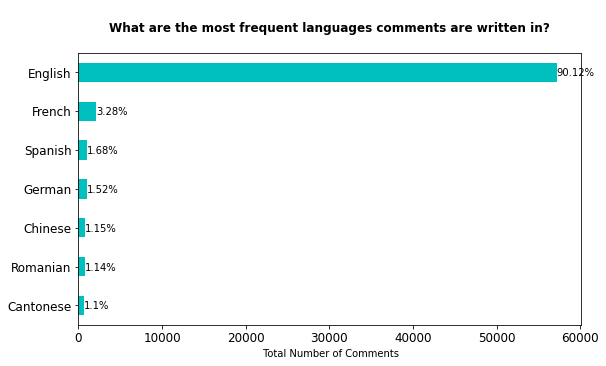

In [42]:
ax = dataframe.language.value_counts().head(7).plot(kind='barh', figsize=(9,5), color="c", 
                                             fontsize=12);

ax.set_title("\nWhat are the most frequent languages comments are written in?\n", 
             fontsize=12, fontweight='bold')
ax.set_xlabel(" Total Number of Comments", fontsize=10)
ax.set_yticklabels(['English', 'French', 'Spanish', 'German', 'Chinese','Romanian','Cantonese'])

# create a list to collect the plt.patches data
totals = []
# find the ind. values and append to list
for i in ax.patches:
    totals.append(i.get_width())
# get total
total = sum(totals)

# set individual bar labels using above list
for i in ax.patches:
    ax.text(x=i.get_width(), y=i.get_y()+.35, 
            s=str(round((i.get_width()/total)*100, 2))+'%', 
            fontsize=10, color='black')
    
# invert for largest on top 
ax.invert_yaxis()

In [43]:
eng_data = dataframe[(dataframe['language']=='en')]

In [44]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [45]:
# import necessary libraries
from nltk.corpus import stopwords
from wordcloud import WordCloud
from collections import Counter
from PIL import Image

import re
import string

In [46]:
# wrap the plotting in a function for easier access
def plot_wordcloud(wordcloud, language):
    plt.figure(figsize=(12, 10))
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis("off")
    plt.title(language + ' Comments\n', fontsize=18, fontweight='bold')
    plt.show()

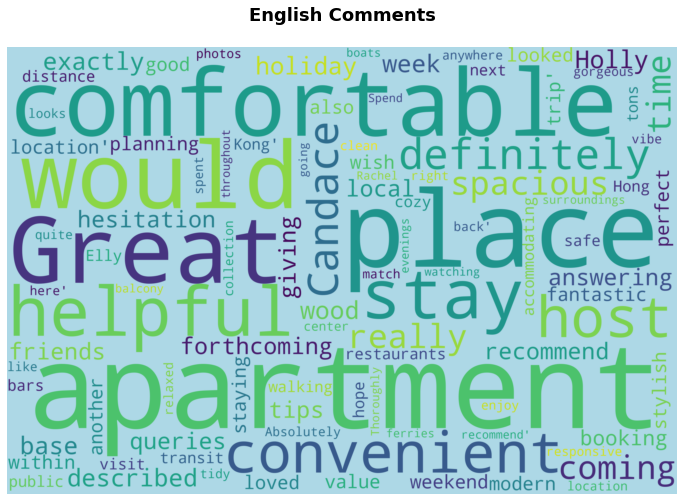

In [48]:
#WORD CLOUD FOR ENGLISH WORDS

wordcloud = WordCloud(max_font_size=None, max_words=200, background_color="lightblue", 
                      width=3000, height=2000,
                      stopwords=stopwords.words('english')).generate(str(eng_data.comments.values))

plot_wordcloud(wordcloud, 'English')

# Sentimental Analysis


In [49]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [50]:
# use the polarity_scores() method to get the sentiment metrics
def print_sentiment_scores(sentence):
    snt = SentimentIntensityAnalyzer().polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(snt)))

In [51]:
# getting only the negative score
def negative_score(text):
    negative_value = analyzer.polarity_scores(text)['neg']
    return negative_value

# getting only the neutral score
def neutral_score(text):
    neutral_value = analyzer.polarity_scores(text)['neu']
    return neutral_value

# getting only the positive score
def positive_score(text):
    positive_value = analyzer.polarity_scores(text)['pos']
    return positive_value

# getting only the compound score
def compound_score(text):
    compound_value = analyzer.polarity_scores(text)['compound']
    return compound_value

In [52]:
%%time


eng_data['sentiment_neg'] = eng_data['comments'].apply(negative_score)
eng_data['sentiment_neu'] = eng_data['comments'].apply(neutral_score)
eng_data['sentiment_pos'] = eng_data['comments'].apply(positive_score)
eng_data['sentiment_compound'] = eng_data['comments'].apply(compound_score)

Wall time: 3min 13s


In [53]:
#applying sentimenatl analysis on eng commenst beacsue majority

eng_data.head(5)

,listing_id,id,date,reviewer_id,reviewer_name,comments,neighbourhood_group,host_id,latitude,longitude,...,review_scores_value,review_scores_cleanliness,review_scores_checkin,review_scores_rating,review_scores_accuracy,language,sentiment_neg,sentiment_neu,sentiment_pos,sentiment_compound
0,17891,37352.0,23-04-2010,76132,Tamara,apartment Holly wood exactly described comfort...,Central & Western,69063,22.28327,114.14988,...,4.66,4.51,4.92,4.76,4.73,en,0.045,0.598,0.357,0.9274
1,17891,56688.0,24-06-2010,97136,Wendy,Apartment perfect stylish spacious comfortable...,Central & Western,69063,22.28327,114.14988,...,4.66,4.51,4.92,4.76,4.73,en,0.000,0.185,0.815,0.9559
2,17891,76243.0,09-08-2010,163312,Angela,loved staying here weekend apartment fantastic...,Central & Western,69063,22.28327,114.14988,...,4.66,4.51,4.92,4.76,4.73,en,0.000,0.594,0.406,0.9630
3,17891,93590.0,09-09-2010,148333,Jennifer,awesome loft that looks just like does photos ...,Central & Western,69063,22.28327,114.14988,...,4.66,4.51,4.92,4.76,4.73,en,0.000,0.600,0.400,0.9732
4,17891,108082.0,29-09-2010,218702,Matt,Candace great prepared loft with fresh towels ...,Central & Western,69063,22.28327,114.14988,...,4.66,4.51,4.92,4.76,4.73,en,0.000,0.641,0.359,0.9652


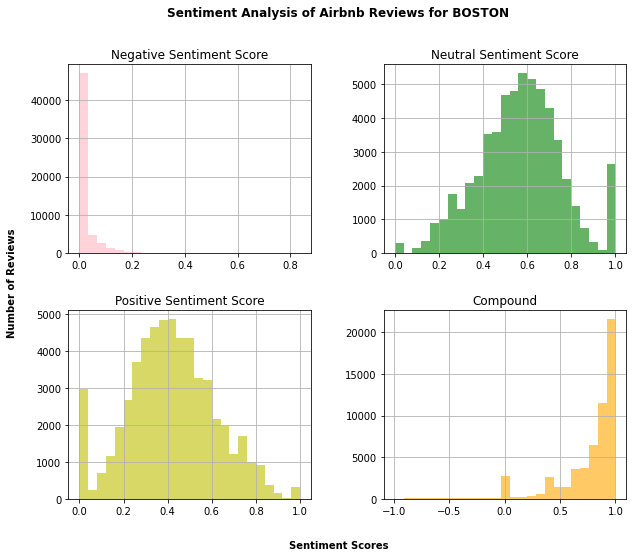

In [55]:
# all scores in 4 histograms
fig, axes = plt.subplots(2, 2, figsize=(10,8))

# plot all 4 histograms
eng_data.hist('sentiment_neg', bins=25, ax=axes[0,0], color='lightpink', alpha=0.6)
axes[0,0].set_title('Negative Sentiment Score')
eng_data.hist('sentiment_neu', bins=25, ax=axes[0,1], color='g', alpha=0.6)
axes[0,1].set_title('Neutral Sentiment Score')
eng_data.hist('sentiment_pos', bins=25, ax=axes[1,0], color='y', alpha=0.6)
axes[1,0].set_title('Positive Sentiment Score')
eng_data.hist('sentiment_compound', bins=25, ax=axes[1,1], color='orange', alpha=0.6)
axes[1,1].set_title('Compound')

# plot common x- and y-label
fig.text(0.5, 0.04, 'Sentiment Scores',  fontweight='bold', ha='center')
fig.text(0.04, 0.5, 'Number of Reviews', fontweight='bold', va='center', rotation='vertical')

# plot title
plt.suptitle('Sentiment Analysis of Airbnb Reviews for BOSTON\n\n', fontsize=12, fontweight='bold');

In [56]:
eng_data.query('sentiment_pos> 0')

,listing_id,id,date,reviewer_id,reviewer_name,comments,neighbourhood_group,host_id,latitude,longitude,...,review_scores_value,review_scores_cleanliness,review_scores_checkin,review_scores_rating,review_scores_accuracy,language,sentiment_neg,sentiment_neu,sentiment_pos,sentiment_compound
0,17891,3.735200e+04,23-04-2010,76132,Tamara,apartment Holly wood exactly described comfort...,Central & Western,69063,22.28327,114.14988,...,4.66,4.51,4.92,4.76,4.73,en,0.045,0.598,0.357,0.9274
1,17891,5.668800e+04,24-06-2010,97136,Wendy,Apartment perfect stylish spacious comfortable...,Central & Western,69063,22.28327,114.14988,...,4.66,4.51,4.92,4.76,4.73,en,0.000,0.185,0.815,0.9559
2,17891,7.624300e+04,09-08-2010,163312,Angela,loved staying here weekend apartment fantastic...,Central & Western,69063,22.28327,114.14988,...,4.66,4.51,4.92,4.76,4.73,en,0.000,0.594,0.406,0.9630
3,17891,9.359000e+04,09-09-2010,148333,Jennifer,awesome loft that looks just like does photos ...,Central & Western,69063,22.28327,114.14988,...,4.66,4.51,4.92,4.76,4.73,en,0.000,0.600,0.400,0.9732
4,17891,1.080820e+05,29-09-2010,218702,Matt,Candace great prepared loft with fresh towels ...,Central & Western,69063,22.28327,114.14988,...,4.66,4.51,4.92,4.76,4.73,en,0.000,0.641,0.359,0.9652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106529,52208871,4.545980e+17,19-09-2021,336018303,Sze Ting,Great place nice host Recommended,Wan Chai,370245790,22.28041,114.18474,...,5.00,5.00,5.00,5.00,5.00,en,0.000,0.187,0.813,0.8271
106530,52208871,4.654700e+17,04-10-2021,392646644,Henry,Great location Causeway many restaraunts shopp...,Wan Chai,370245790,22.28041,114.18474,...,5.00,5.00,5.00,5.00,5.00,en,0.000,0.436,0.564,0.9607
106531,52229081,4.691050e+17,09-10-2021,32834268,Qin,cozy comfortable safe place stay Elly helpful ...,Islands,422799373,22.29316,113.95211,...,5.00,4.00,5.00,5.00,4.00,en,0.000,0.339,0.661,0.9393
106532,52291882,4.590090e+17,25-09-2021,62045253,Pinky,Absolutely gorgeous place with quite collectio...,Islands,62361131,22.20742,114.02836,...,4.50,5.00,5.00,5.00,5.00,en,0.000,0.606,0.394,0.9183


In [57]:
eng_data.query('sentiment_neg > sentiment_pos')

,listing_id,id,date,reviewer_id,reviewer_name,comments,neighbourhood_group,host_id,latitude,longitude,...,review_scores_value,review_scores_cleanliness,review_scores_checkin,review_scores_rating,review_scores_accuracy,language,sentiment_neg,sentiment_neu,sentiment_pos,sentiment_compound
221,103760,6.106820e+05,09-10-2011,901583,Sue,unit certainly well located however washing ma...,Central & Western,304876,22.28418,114.15431,...,4.40,4.44,4.46,4.44,4.39,en,0.098,0.811,0.091,0.1063
237,103760,1.152720e+06,19-04-2012,2035857,Jony,room apartment lift have many luggages will tr...,Central & Western,304876,22.28418,114.15431,...,4.40,4.44,4.46,4.44,4.39,en,0.278,0.722,0.000,-0.4019
351,103760,4.409442e+07,24-08-2015,3564910,Philip,only waited minutes summer heat city host moth...,Central & Western,304876,22.28418,114.15431,...,4.40,4.44,4.46,4.44,4.39,en,0.074,0.859,0.067,-0.0772
353,103760,5.002254e+07,08-10-2015,24786922,Vivi,stay Brend flat really awful There Snell toile...,Central & Western,304876,22.28418,114.15431,...,4.40,4.44,4.46,4.44,4.39,en,0.244,0.618,0.138,-0.8122
423,103760,2.329300e+08,07-02-2018,547088,George,little irritated that Brend charged early chec...,Central & Western,304876,22.28418,114.15431,...,4.40,4.44,4.46,4.44,4.39,en,0.129,0.793,0.078,-0.6509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105917,47824002,7.318495e+08,16-02-2021,303584774,Yash,Host boss keep calling some other person every...,Eastern,10086415,22.28316,114.23233,...,4.73,4.90,4.93,4.83,4.73,en,0.173,0.732,0.096,-0.7003
105930,47824002,7.687500e+08,11-06-2021,49706496,Jonathan,will regret,Eastern,10086415,22.28316,114.23233,...,4.73,4.90,4.93,4.83,4.73,en,0.737,0.263,0.000,-0.4215
105966,48047508,3.937520e+17,27-06-2021,378317976,Hikaru,Lower rate Cons Bedbugs cards deactivated seve...,Yau Tsim Mong,146234685,22.29948,114.17664,...,3.00,1.50,2.50,1.50,1.50,en,0.268,0.732,0.000,-0.5242
106255,50269383,4.190720e+17,01-08-2021,325774877,Anson,Sorry this worst staying experience Airbnb eve...,Islands,109310747,22.20818,114.02998,...,2.33,2.33,3.67,2.67,3.67,en,0.170,0.685,0.144,-0.4048


In [58]:
percentiles = eng_data.sentiment_compound.describe(percentiles=[.05, .1, .2, .3, .4, .5, .6, .7, .8, .9])
percentiles

count    57176.000000
mean         0.763365
std          0.287317
min         -0.988900
5%           0.000000
10%          0.421500
20%          0.624900
30%          0.753200
40%          0.828100
50%          0.877900
60%          0.913400
70%          0.939000
80%          0.958600
90%          0.975300
max          0.999100
Name: sentiment_compound, dtype: float64

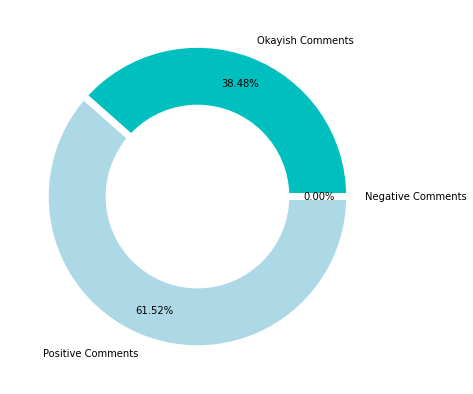

In [62]:


# assign the data
neg = percentiles['5%']
mid = percentiles['20%']
pos = percentiles['max']
names = ['Negative Comments', 'Okayish Comments','Positive Comments']
size = [neg, mid, pos]

# call a pie chart
plt.pie(size, labels=names, colors=['g', 'c', 'lightblue'], 
        autopct='%.2f%%', pctdistance=0.8,
        wedgeprops={'linewidth':7, 'edgecolor':'white' })

# create circle for the center of the plot to make the pie look like a donut
my_circle = plt.Circle((0,0), 0.6, color='white')

# plot the donut chart
fig = plt.gcf()
fig.set_size_inches(7,7)
fig.gca().add_artist(my_circle)
plt.show()

In [63]:
# full dataframe with POSITIVE comments
df_pos = eng_data.loc[eng_data.sentiment_compound >= 0.95]

# only corpus of POSITIVE comments
pos_comments = df_pos['comments'].tolist()

In [64]:
# full dataframe with NEGATIVE comments
df_neg = eng_data.loc[eng_data.sentiment_compound < 0.0]

# only corpus of NEGATIVE comments
neg_comments = df_neg['comments'].tolist()

# comparing positive and negative comments


In [65]:
df_pos['text_length'] = df_pos['comments'].apply(len)
df_neg['text_length'] = df_neg['comments'].apply(len)

In [66]:
pos_comments[10:15]

['amazing time Hong Kong least because staying loft Location perfect exploring during going night Apartment very spacious Candace delight deal with definitely recommend anyone',
 'apartment gorgeous Candace incredibly nice location great business like noise floor flat busy road light white gauzy curtains might problem good night sleep Other than that very happy with stay would definitely come again when holiday work',
 'This place great Beautiful clean interior safe super location just around corner from many attractions Central Although Candace town stay made every effort accommodating make excellent recommendations email when vacation doorman really friendly made feel welcome There even small balcony from which enjoy people watching Hollywood Road sleep this place much better value than hotels area Thank Candace',
 'Candace lifesaver accepted request even very last minute place Fantastic Close nice restaurants within crawling distance from kwai fong clubs This room made vacation real

In [67]:
# read some negative comments
neg_comments[10:15]

['very convenient stay here apartment located less than minutes tram subway Laundry convenience store were right downstairs grocery store also just block down sensitive certain smells know that apartment located street where dried seafood herb stores Adults problem with kids struggled with beginning',
 'host insisted call upon arrival airport have local phone number inclined just days this inconvenient When finally reached host told under carpet front apartment door could have told that mail There stains couch carpet airconditioning living room extremely noisy shower hose leaking when arrived mailed host next morning Friday didn reply until Monday host hadn explained water heater worked assumed broken well until discovered button near kitchen door days into stay ceiling bedrooms stopped functioning Long story short afraid really cannot recommend this place',
 'were very disappointed call Brendan Hong Kong airport know taking taxi apartment also email well advance know what time arrivin

# Word cloud positive comments

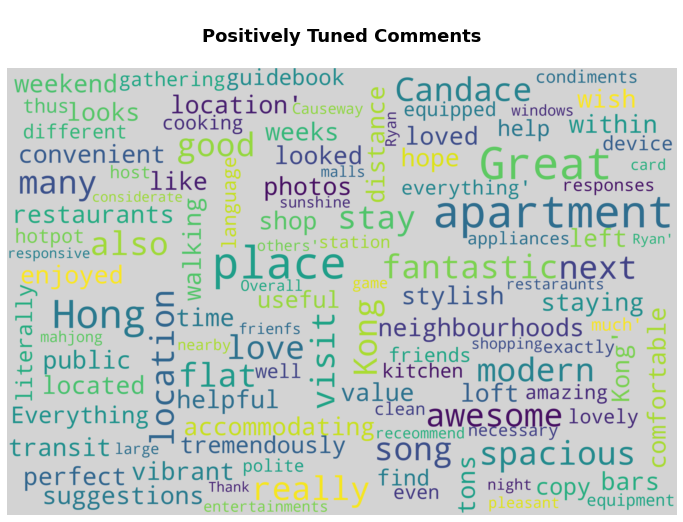

In [69]:
wordcloud = WordCloud(max_font_size=200, max_words=200, background_color="lightgrey",
                      width= 3000, height = 2000,
                      stopwords = stopwords.words('english')).generate(str(df_pos.comments.values))

plot_wordcloud(wordcloud, '\nPositively Tuned')

In [70]:
# importing libraries
from sklearn.feature_extraction.text import CountVectorizer
from yellowbrick.text.freqdist import FreqDistVisualizer
from yellowbrick.style import set_palette

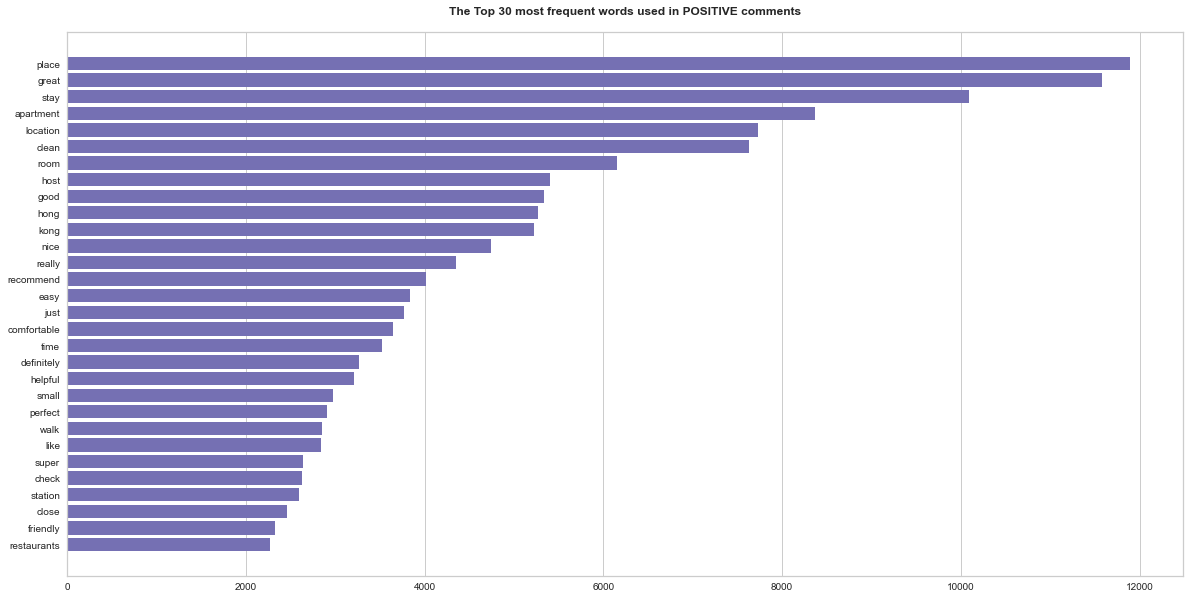

In [76]:
# vectorizing text
vectorizer = CountVectorizer(stop_words='english')
docs = vectorizer.fit_transform(pos_comments)
features = vectorizer.get_feature_names()

# preparing the plot
set_palette('dark')
plt.figure(figsize=(20,10))
plt.title('The Top 30 most frequent words used in POSITIVE comments\n', fontweight='bold')

# instantiating and fitting the FreqDistVisualizer, plotting the top 30 most frequent terms
visualizer = FreqDistVisualizer(features=features, n=30)
visualizer.fit(docs)
visualizer.poof;

# Word cloud negative commnets

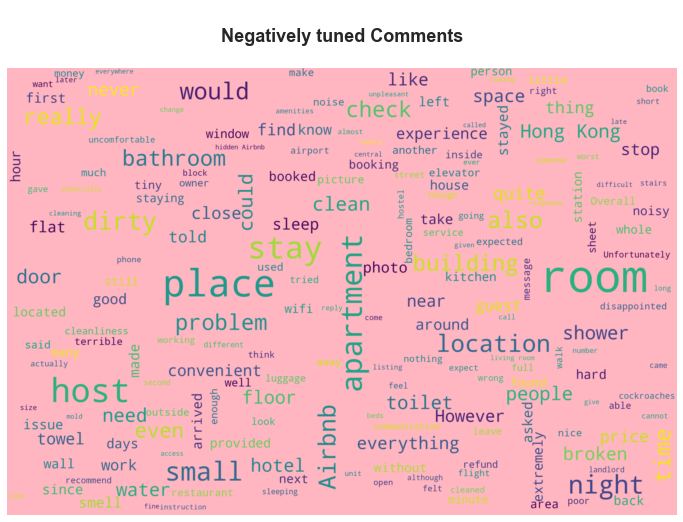

In [78]:
wordcloud = WordCloud(max_font_size=200, max_words=200, background_color="lightpink",
                      width= 3000, height = 2000,
                      stopwords = stopwords.words('english')).generate(str(df_neg.comments.values))

plot_wordcloud(wordcloud, '\nNegatively tuned')

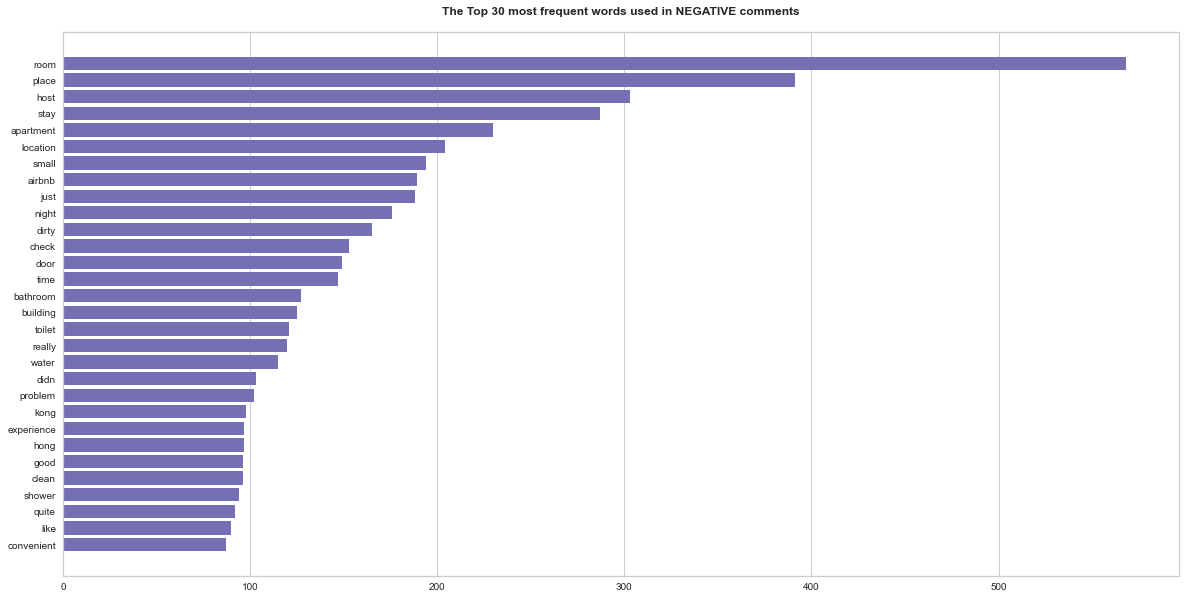

In [79]:
# vectorizing text
vectorizer = CountVectorizer(stop_words='english')
docs = vectorizer.fit_transform(neg_comments)
features = vectorizer.get_feature_names()

# preparing the plot
set_palette('dark')
plt.figure(figsize=(20,10))
plt.title('The Top 30 most frequent words used in NEGATIVE comments\n', fontweight='bold')

# instantiating and fitting the FreqDistVisualizer, plotting the top 30 most frequent terms
visualizer = FreqDistVisualizer(features=features, n=30)
visualizer.fit(docs)
visualizer.poof;

# To find the Top Hosts based on User Reviews and Top Hosts' neighbourhood¶

In [80]:
dataframe['comments'][0]

'apartment Holly wood exactly described comfortable very convenient base week holiday host very forthcoming answering queries giving some local tips would definitely recommend Candace place friends would have hesitation booking again when planning another trip'

In [81]:
# function to calculate the sentiments of the user reviews

def nltk_sentiment(input_text):
    score_dict = analyzer.polarity_scores(input_text)
    return score_dict['compound']

In [82]:
# testing the function

nltk_sentiment(dataframe['comments'][0])

0.9274

In [83]:
# applying the function to the whole column

dataframe['Sentiment_NLTK'] = dataframe['comments'].apply(lambda x: nltk_sentiment(str(x)))

In [84]:
 # creating a new dataframe where I'm grouping the listing_id column i.e. according to the listings
# and further calculating the average of the sentiment score

reviews_avg = dataframe .groupby(['listing_id']).mean()['Sentiment_NLTK']

reviews_avg.head

<bound method NDFrame.head of listing_id
17891       0.897110
69074       0.849190
103760      0.741795
104626      0.859664
132773      0.749456
              ...   
52208871    0.893900
52229081    0.939300
52291882    0.903300
52485671    0.000000
52656625    0.000000
Name: Sentiment_NLTK, Length: 2912, dtype: float64>

# Top 5 Hosts

In [85]:
reviews_avg.nlargest()

listing_id
25218171    0.9976
9886041     0.9970
47714753    0.9955
35291265    0.9936
39713313    0.9912
Name: Sentiment_NLTK, dtype: float64

In [86]:
# creating a top_hosts dataframe

top_hosts = pd.DataFrame()
listing_ids = list(reviews_avg.nlargest().index)
for idx in listing_ids:
    top_hosts = top_hosts.append(listings[listings.id==idx])
top_hosts.reset_index(inplace=True)
del top_hosts['index']

top_hosts.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,25218171,https://www.airbnb.com/rooms/25218171,2.021100e+13,23-10-2021,Cottage in Shatin (Single Room),My cottage in Shatin is a quiet and beautiful ...,NaN,https://a0.muscache.com/pictures/89afe93f-9c47...,189448943,https://www.airbnb.com/users/show/189448943,...,5.0,4.0,5.0,NaN,f,4,1,3,0,0.08
1,9886041,https://www.airbnb.com/rooms/9886041,2.021100e+13,23-10-2021,A:New refurbished update pic coming,"Brand new, single bath room, free wifi. Locate...",NaN,https://a0.muscache.com/pictures/de82c9b3-9522...,50614541,https://www.airbnb.com/users/show/50614541,...,5.0,3.0,3.0,NaN,t,6,3,3,0,0.01
2,47714753,https://www.airbnb.com/rooms/47714753,2.021100e+13,23-10-2021,3. NEW loft-bed studio CITYU BU no needsharing...,Totally brand-new! <br />NO NEED SHARING<br />...,"Full of banks, bus stops, restaurants, superma...",https://a0.muscache.com/pictures/2061309d-359e...,12526206,https://www.airbnb.com/users/show/12526206,...,5.0,5.0,5.0,NaN,t,7,7,0,0,0.23
3,35291265,https://www.airbnb.com/rooms/35291265,2.021100e+13,23-10-2021,Super comfortable house with balcony and rooftop,A nice cosy place on the 2nd floor with a huge...,"MTR station 4min away. by all buses, or 8min b...",https://a0.muscache.com/pictures/93d6f9a4-af88...,24615995,https://www.airbnb.com/users/show/24615995,...,5.0,5.0,5.0,NaN,t,1,1,0,0,0.59
4,39713313,https://www.airbnb.com/rooms/39713313,2.021100e+13,23-10-2021,Tsim Sha Tsui Single Room 4 Beds** 2 Bunk Bed(...,PHOTO here is OLD photo room. Now is 4 bed in ...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,97240131,https://www.airbnb.com/users/show/97240131,...,5.0,5.0,5.0,NaN,f,344,26,254,64,0.06


In [87]:
# finding the names of top hosts' property

top_hosts.host_name

0      Maria
1      Brian
2        Mrs
3    Crystal
4        Jov
Name: host_name, dtype: object

In [88]:
# finding the neighbourhood of top hosts' property

top_hosts.neighbourhood_cleansed

0          Sha Tin
1    Yau Tsim Mong
2     Kowloon City
3        Yuen Long
4    Yau Tsim Mong
Name: neighbourhood_cleansed, dtype: object

In [89]:
list(top_hosts.neighbourhood_cleansed)

['Sha Tin', 'Yau Tsim Mong', 'Kowloon City', 'Yuen Long', 'Yau Tsim Mong']

In [90]:
# REVIEW/COMMENT OF TOP 1ST HOST WITH LISTING ID==25218171

list(reviews[reviews.listing_id==25218171].comments)

['We are so thankful and blessed to have Maria as our host!! She is super kindness, humble and faithful to God! Our family plan to retreat and rest and her place is perfect for us to stay away from city!!! The environment is like jungle forest with lots of mountain and we can breathe fresh air!!! Here is very quiet, good for rest and retreat!! Our family was so blessed and we also would like to thanks her maid Shirely even make a nice dinner for us and help us clean our clothes!!! In the morning, we heard bird singing and Maria’s friend worship, love to join and worship God together!!!We would happy to keep in touch with her and support her missionary work too. Thanks so much for your kindness hospitality....<br/>We appreciate you and bless you good health....']

In [91]:
# REVIEW OF TOP 2ND HOST JELLE

list(reviews[reviews.listing_id==9886041].comments)

["Had a really nice stay here over New Years (Phone number hidden by Airbnb) /16. \r<br/>\r<br/>The owner was super friendly and helpful, sent us really useful and comprehensive info about the apartment (how to get there, passwords for doors in the building, neighbourhood etc.), always answered emails, calls and (Hidden by Airbnb) messages immediately, offered to pick us up from the subway, even sent some advice on what we could do for NYE. Really sweet guy.   \r<br/>\r<br/>Basically they've renovated one apartment into 4 small separate rooms (very smart). Yes the rooms are tiny but so is pretty much everything in HK. They're clean, brand new (as of Dec (Phone number hidden by Airbnb) , amazing hot/ powerful shower, bed pretty hard but again, pretty standard for China/ HK.    \r<br/>\r<br/>One drawback is that the room we stayed in (room 4 I think?) looked out over an expressway, so it was pretty noisy. The other rooms, I'm not totally sure but I think they might not have any windows. 

In [92]:
# REVIEW OF TOP 3rd HOST JELLE

list(reviews[reviews.listing_id==47714753].comments)

["This cozy room is well designed with thoughtful amenities. The private room is very clean and well fitted with its own kitchenette and electric kettle, along with complimentary use of kitchen ware and utensils. I do however think they need to replace one of the pans from a previous use. Despite this it was a real treat to have great use of my own kitchen in such a cozy space. The washroom was so clean and well renovated with marble tile and even a rain shower fitted in such a tiny space. Genius design with the glass and frosted painted divider which doubled as an ambient light at night. I often kept the washroom light on at night with the door closed to have a great lamp for myself. The sofa and loft bed are so useful for travelers as it utilizes all of the space. the laundry was very convenient and easy to use. What's best is the full size fridge! Thanks for a great stay and easy communication Mrs. Will recommend to anyone. Note: It is a 4 floor walk up, but for the price and amenit